<a href="https://colab.research.google.com/github/Alaaeid2/Text-Recognition-/blob/main/handwriting_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

In [ ]:
(X_train,y_train),(X_test,y_test)= keras.datasets.mnist.load_data()

In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
X_train.shape

(60000, 28, 28)

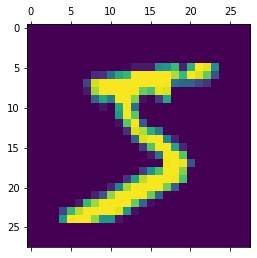

In [ ]:
plt.matshow(X_train[0])

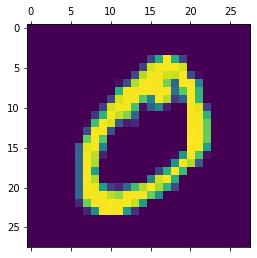

In [ ]:
plt.matshow(X_train[1])

In [ ]:
y_train[1]

0

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [ ]:
X_train_flattened.shape

(60000, 784)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,), activation='sigmoid',)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train_flattened,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4704 - accuracy: 0.8768
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3041 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2833 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2728 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2668 - accuracy: 0.9255


In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2676 - accuracy: 0.9245


[0.2675729990005493, 0.9244999885559082]

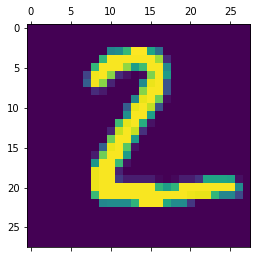

In [ ]:
plt.matshow(X_test[1])

In [ ]:
y_predict=model.predict(X_test_flattened)
y_predict[1]

array([6.5284109e-01, 7.8443885e-03, 9.9954486e-01, 4.3503714e-01,
       9.9171205e-10, 8.9723402e-01, 9.1994274e-01, 1.8719262e-12,
       2.6006907e-01, 4.9571609e-09], dtype=float32)

In [ ]:
np.argmax(y_predict[1])

2

In [ ]:
y_predict_labels = [np.argmax(i) for i in y_predict]
y_predict_labels[:4]

[7, 2, 1, 0]

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test, predictions= y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    5,    5,    2,    1,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   7,   10,  914,   23,    8,    4,   11,   10,   41,    4],
       [   3,    0,   15,  937,    0,   18,    2,   10,   18,    7],
       [   2,    1,    3,    2,  911,    0,   11,    5,   10,   37],
       [  10,    3,    2,   43,   11,  758,   17,    6,   35,    7],
       [  13,    3,    7,    1,    7,    8,  914,    2,    3,    0],
       [   1,    5,   20,   11,    9,    0,    0,  952,    3,   27],
       [   8,    8,    6,   27,    8,   23,    9,   13,  867,    5],
       [  11,    7,    1,   11,   26,    5,    0,   28,    5,  915]],
      dtype=int32)>

Text(69.0, 0.5, 'real_value')

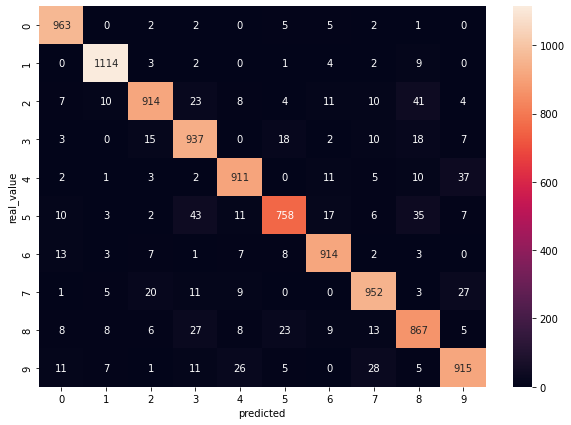

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('real_value')

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,), activation='relu',),
    keras.layers.Dense(10, activation='sigmoid',)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train_flattened,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2795 - accuracy: 0.9211
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1287 - accuracy: 0.9623
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0894 - accuracy: 0.9728
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0686 - accuracy: 0.9791
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0534 - accuracy: 0.9841


In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0802 - accuracy: 0.9747


[0.08019064366817474, 0.9746999740600586]

In [ ]:
y_predict=model.predict(X_test_flattened)
y_predict[1]

array([2.5711656e-03, 9.9946332e-01, 1.0000000e+00, 9.7844565e-01,
       3.3245848e-07, 5.5383712e-02, 7.6675415e-04, 2.5263445e-05,
       3.7739366e-02, 2.4074140e-08], dtype=float32)

In [ ]:
y_predict_labels = [np.argmax(i) for i in y_predict]
y_predict_labels[:4]

[7, 2, 1, 0]

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test, predictions= y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    0,    1,    0,    0,    1,    1,    1,    3,    0],
       [   0, 1130,    2,    1,    0,    1,    1,    0,    0,    0],
       [   8,    6,  995,    4,    4,    0,    2,    8,    5,    0],
       [   0,    1,    7,  986,    0,    3,    0,    4,    2,    7],
       [   1,    0,    0,    0,  963,    0,    5,    3,    1,    9],
       [   3,    1,    2,   12,    0,  860,    2,    2,    6,    4],
       [   7,    3,    1,    1,    8,    6,  926,    1,    5,    0],
       [   3,    4,    8,    3,    0,    0,    0, 1002,    1,    7],
       [   5,    1,    5,    8,    7,    4,    1,    6,  927,   10],
       [   3,    2,    0,    5,    6,    1,    0,    6,    1,  985]],
      dtype=int32)>

Text(69.0, 0.5, 'real_value')

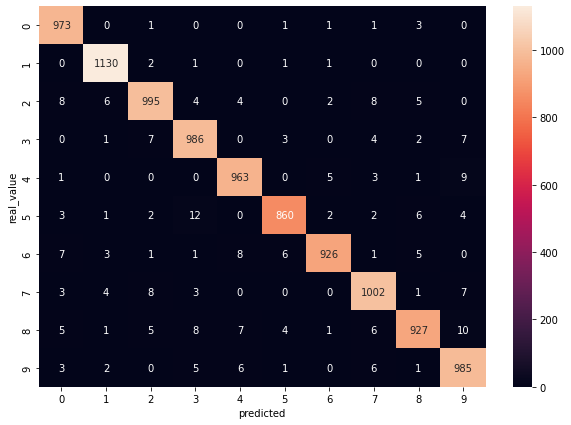

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('real_value')

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu',),
    keras.layers.Dense(10, activation='sigmoid',)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train,y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2757 - accuracy: 0.9230
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1240 - accuracy: 0.9640
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0862 - accuracy: 0.9748
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0666 - accuracy: 0.9800
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0517 - accuracy: 0.9846
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0417 - accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0342 - accuracy: 0.9898
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0276 - accuracy: 0.9915
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0232 - accuracy: 0.9928
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019